In [2]:
import os
def get_api_key(api_key_name):
    return os.getenv(api_key_name)

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import find_dotenv, load_dotenv

'''
model="gemini-1.5-flash"   # Fast and cheap
# OR
model="gemini-1.5-pro"     # More powerful
# OR
model="gemini-pro"         # Legacy but still available

'''
load_dotenv(find_dotenv())
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.3, google_api_key=get_api_key("GOOGLE_API_KEY"))

d:\Ineuron-materials-FSDS\Gen AI\Learning-langgraph\langgraph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
class State(TypedDict):
    # messages have the type "list".
    # The add_messages function appends messages to the list, rather than overwriting them
    messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

In [20]:
def chatbott(state: State):
    return {"messages": [llm.invoke(state["messages"])]}
#The first argument is the unique node name
# The second argument is the function or object that will be called whenever the node is used.’’’
graph_builder.add_node("chatbott", chatbott)

In [21]:
# Set entry and finish points
graph_builder.set_entry_point("chatbott")
graph_builder.set_finish_point("chatbott")

In [10]:
# graph = graph_builder.compile()
# from IPython.display import Image, display
# display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
# Run the chatbot
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

Assistant: Hi there! How can I help you today?
Assistant: I am doing well, thank you for asking!  How are you today?
Assistant: I am a large language model, trained by Google.  I'm a computer program designed to process information and respond to a wide range of prompts and questions.  I don't have personal experiences, feelings, or a physical body.  My purpose is to provide helpful and informative responses based on the vast amount of text data I've been trained on.
Goodbye!


In [31]:
for i in value["messages"]:
    print(i)

content="I am a large language model, trained by Google.  I'm a computer program designed to process information and respond to a wide range of prompts and questions.  I don't have personal experiences, feelings, or a physical body.  My purpose is to provide helpful and informative responses based on the vast amount of text data I've been trained on." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run--b931d044-9d48-410b-9708-1fea41fec925-0' usage_metadata={'input_tokens': 3, 'output_tokens': 75, 'total_tokens': 78, 'input_token_details': {'cache_read': 0}}


In [5]:
def function_1(input_1):
    return input_1 + " First Function "

def function_2(input_2):
    return input_2 + "to Second Function"

In [6]:
from langgraph.graph import Graph

# Define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [7]:
app.invoke('I am moving from')

'I am moving from First Function to Second Function'

In [8]:
input = 'I am moving from'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'node_1':
---
I am moving from First Function 

---

Output from node 'node_2':
---
I am moving from First Function to Second Function

---



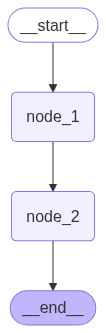

In [9]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)